# National cybersikkehed træningsdage
# Exploitation 1: Programs as data
Trainers: Alessandro Bruni, Sebastian Kjærsgaard Olsen, Kristoffer Westi Astrup, Emilie Haase, Jacob Buchholz Bech

## IT-University of Copenhagen


# Part 0: What is exploitation

- Exploitation is the art of making programs do unintended things
- (to our advantage)

In [1]:
import random
lucky_number = random.randint(0,1000)

print("Make your guess: ")
x = eval(input())
if x == lucky_number:
    print("You win :)", x, "is the right guess")
else:
    print("You loose :/", x, "is not right")

Make your guess: 
10
You loose :/ 10 is not right


- to be good at exploitation we need to understand programs very well, this is what today is about!
- on saturday, we look at how to use this knowledge to attack cool programs

## Plan for today

- today we look at how computers store, compile and execute programs, to get a better understanding about how they operate

0. Intro
1. Representing numbers and text
2. Programs (in C)
3. Computer architecture
4. ISAs
5. Program graphs

# Preliminiaries

- You need good tools to help you in your work.
- Here is what we use today:
    + Python: https://www.python.org/downloads/
    + Cutter: https://cutter.re/
- For saturday, download and install VirtualBox with Kali:
    + VirtualBox: https://www.virtualbox.org/wiki/Downloads
    + Kali Linux: https://www.kali.org/

# Part 1: 0s and 1s
- we know computers work with 1s and 0s, but what does it really mean?

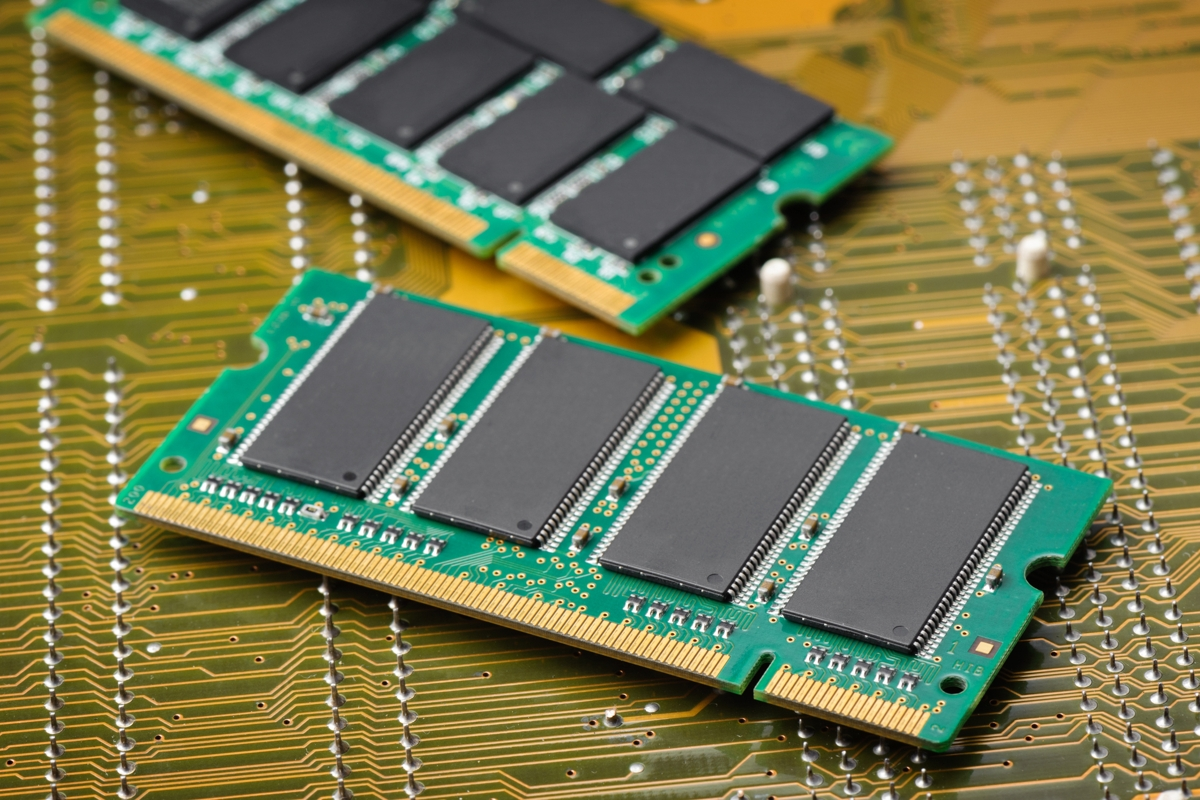

# Binary, Octal, Hexadecimal, etc.

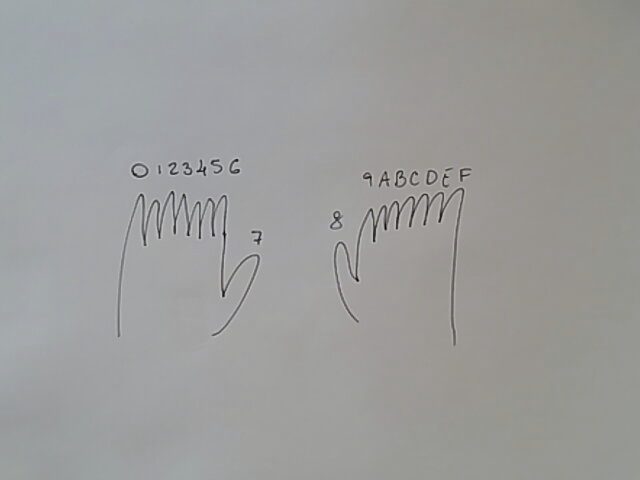

# Using Python to convert between formats

# Text representation: ASCII, UTF-8

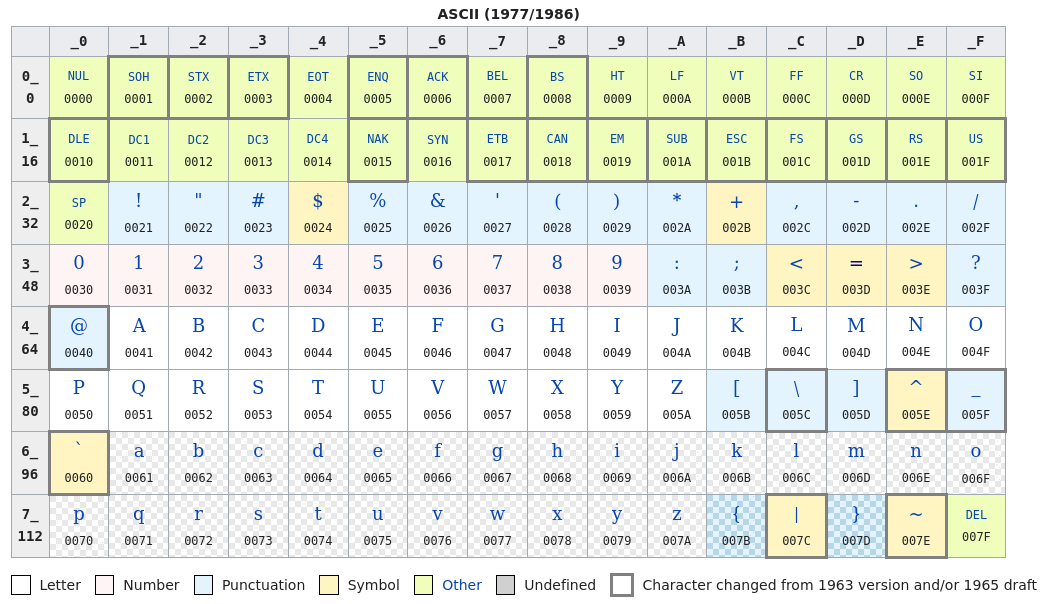

# PRO level: base64

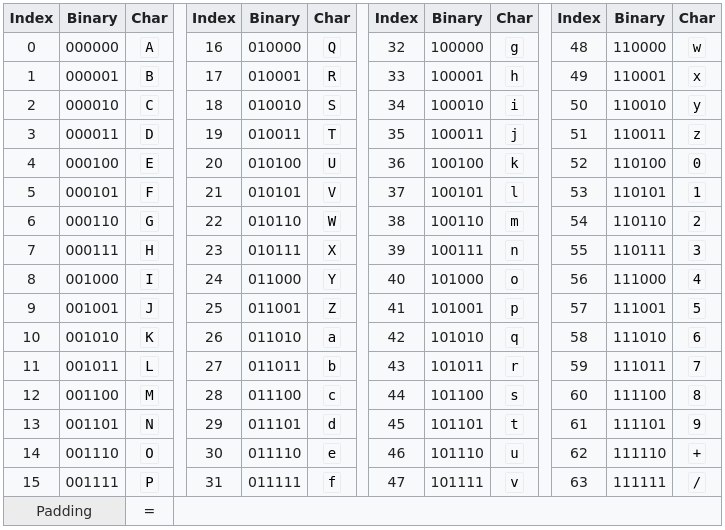

What's the value of 8434178615911931332? let's find out!

In [11]:
from IPython.lib.display import YouTubeVideo
play = YouTubeVideo
from IPython.display import HTML
play = lambda x: HTML('<a href="https://www.youtube.com/watch?v=' + x + '">' + x + '</a>')

In [15]:
import base64
b = int.to_bytes(8434178615911931332, byteorder='big', length=8)
play(base64.b64encode(b)[:-1].decode('utf8'))

# Exercises!

# Part 2: C programs

- C is the common denominator of programming languages
- There are many languages out there, get to know as many as you can! :)

# Demistifying compilers
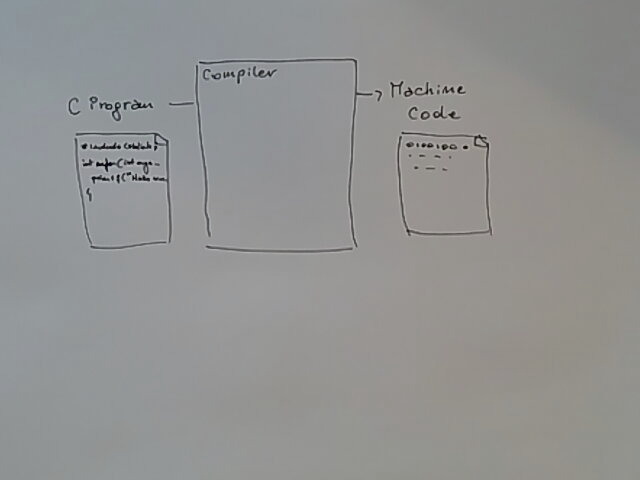

# Types:

- Integers: `int`, `long`
- Reals: `float`
- Characters: `char`
- Arrays: e.g. `char[32]`
- Pointers: e.g. `char *`

# Control, loop, input and output, comments

```c
if (x < 10) {
    printf("Very small number\n"); // This is an output
} else {
    printf("It's a big number!\n");
}
```

```c
int numbers[10];
while (i < 10) {
    scanf("Type a number: %i", &numbers[i]); // This is an input
    i++;
}
```

# Functions

The typical structure of a C program:
```c
#include <stdio.h>
#include <string.h>

int f(int x) { // Example function
    for (int i = 0; i < 10; i++) {
        x = x+i;
    }
    return x;
}

int main(argc, char** argv) {
    // Code here
}
```

# Exercises!

# Part 3: Hardware

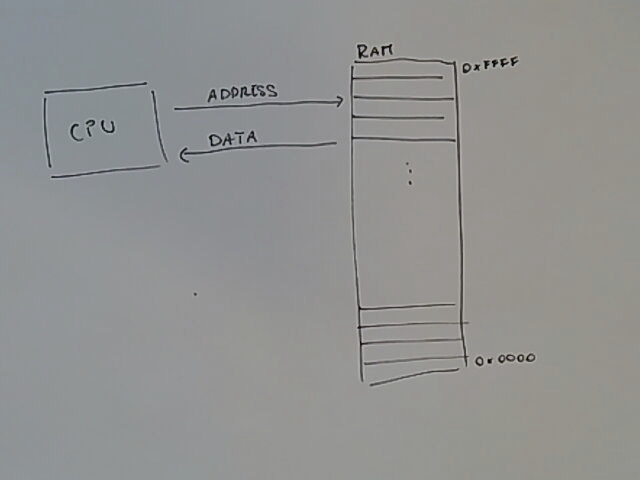

- Intro to how the CPU works, registers, stack and RAM.
- Instructions are stored on memory, like data.
- CPU cycle: Fetch instruction, decode, execute.
- Types of operations, load, store, math and logic. RISC vs CISC

# Part 4: Instruction Set Architectures (ISA)

- There are many architectures out there, today we look at the two most common, x86 and ARM

# x86 registers

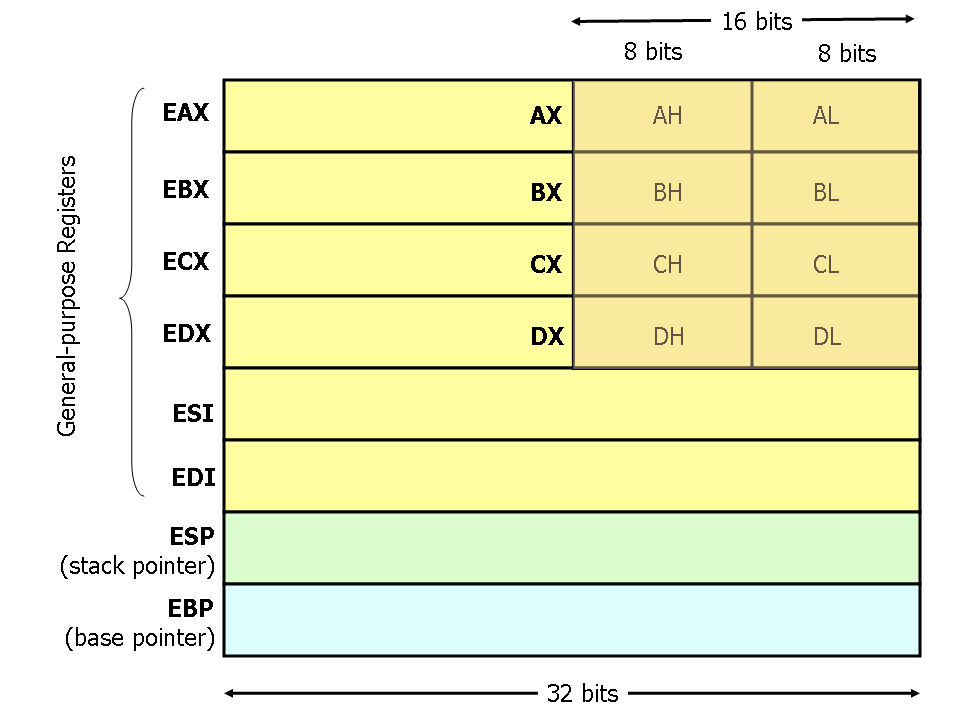

# x86 assembly

```
main:
.LFB0:
	.cfi_startproc
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	subq	$16, %rsp
	movl	%edi, -4(%rbp)
	movq	%rsi, -16(%rbp)
	cmpl	$1, -4(%rbp)
	jle	.L2
	movq	-16(%rbp), %rax
	addq	$8, %rax
	movq	(%rax), %rax
	movl	$.LC0, %esi
	movq	%rax, %rdi
	call	strcmp
	testl	%eax, %eax
	jne	.L2
	movl	$.LC1, %edi
	call	puts
	jmp	.L3
.L2:
	movl	$.LC2, %edi
	call	puts
.L3:
	movl	$0, %eax
	leave
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc
```

# ARM registers

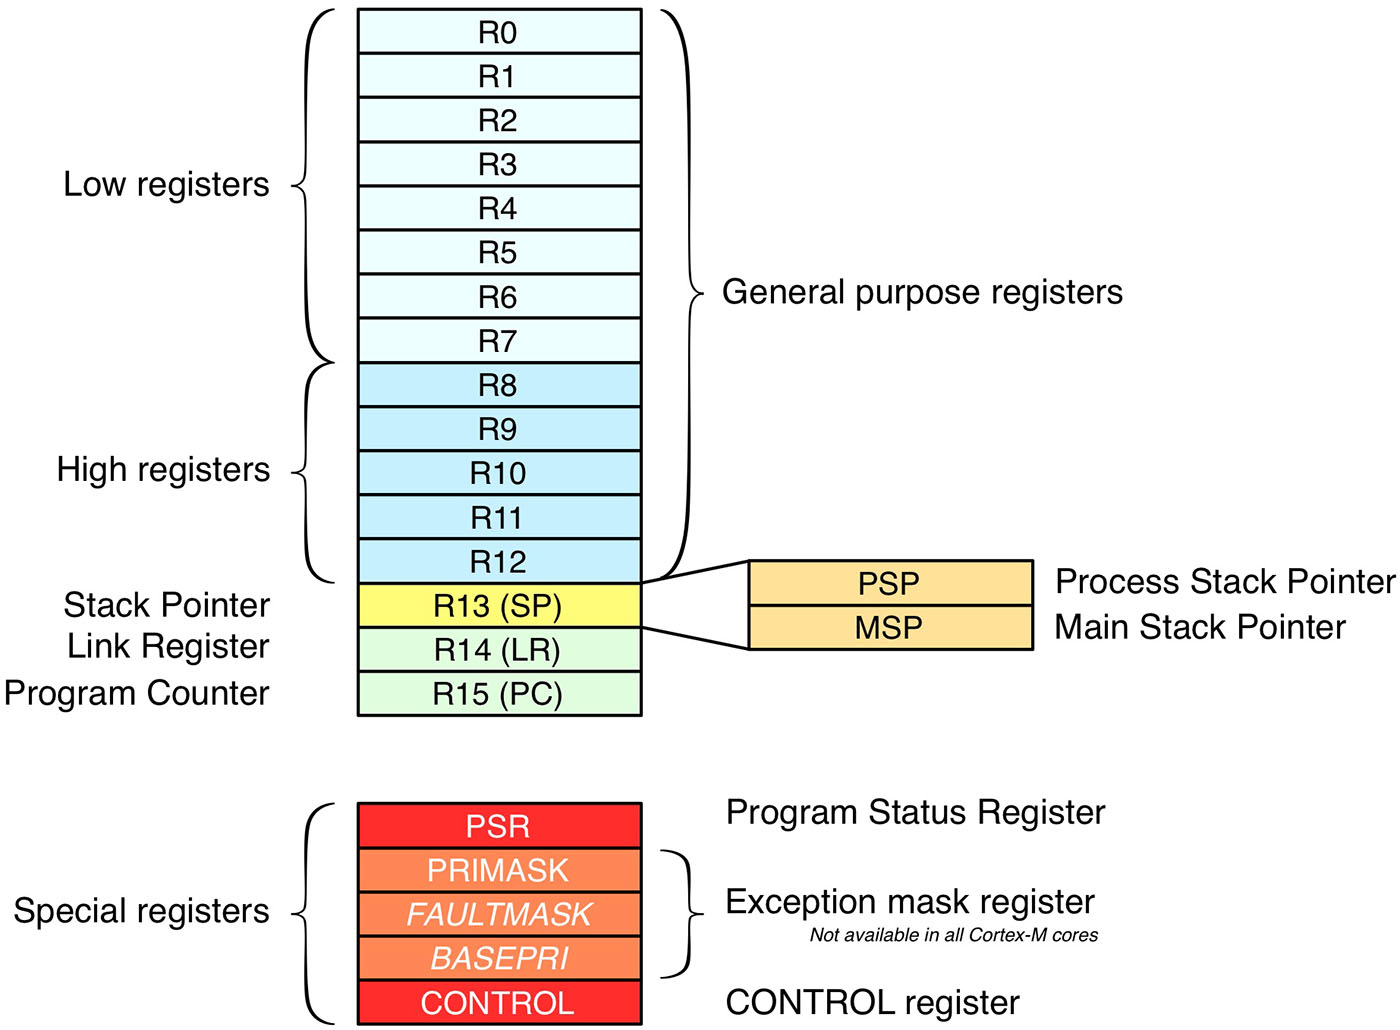

# ARM assembly

```
main:
	@ Function supports interworking.
	@ args = 0, pretend = 0, frame = 8
	@ frame_needed = 1, uses_anonymous_args = 0
	push	{fp, lr}
	add	fp, sp, #4
	sub	sp, sp, #8
	str	r0, [fp, #-8]
	str	r1, [fp, #-12]
	ldr	r3, [fp, #-8]
	cmp	r3, #1
	ble	.L2
	ldr	r3, [fp, #-12]
	add	r3, r3, #4
	ldr	r3, [r3]
	ldr	r1, .L5
	mov	r0, r3
	bl	strcmp
	mov	r3, r0
	cmp	r3, #0
	bne	.L2
	ldr	r0, .L5+4
	bl	puts
	b	.L3
.L2:
	ldr	r0, .L5+8
	bl	puts
.L3:
	mov	r3, #0
	mov	r0, r3
	sub	sp, fp, #4
	@ sp needed
	pop	{fp, lr}
	bx	lr
```

# Exercises
- get familiar with those instruction sets!

# Part 5: Navigating binaries

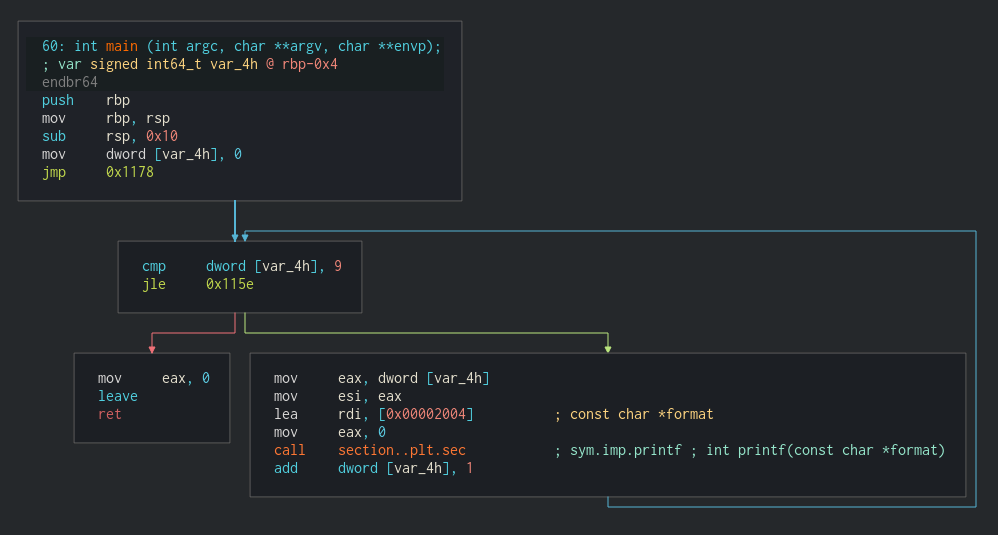

# Exercises
- open cutter and follow along :)

Cutter! Look at program graphs from 2. or 3. 

What does this binary do? Provide simple binaries; 

Double function (only main) 

Pincode / password prompt (stdin perhaps?) 

Fibonacci (iteratively)  

# Survey

How did today go? Let us know!

https://www.survey-xact.dk/LinkCollector?key=FZKJ1GHKSNCN

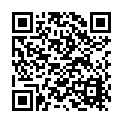